In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils

In [60]:
#opsdb = maf.db.OpsimDatabase('long_gaps_nightsoff1_v2.0_10yrs.db')
opsdb = maf.db.OpsimDatabase('../baseline/baseline_v2.0_10yrs.db')


In [61]:
bundleList = []

metric = maf.metrics.PassMetric(cols='observationStartMJD')

slicer = maf.slicers.UserPointsSlicer(ra=[0], dec=[-20])
constraint = ''
bundleList.append(maf.MetricBundle(metric, slicer, constraint))


In [62]:
outDir = 'temp'
bd = maf.metricBundles.makeBundlesDictFromList(bundleList)
bg = maf.MetricBundleGroup(bd, opsdb, outDir='temp')

In [63]:
bg.runAll()

Querying database observations with no constraint for columns ['fieldDec', 'observationStartMJD', 'rotSkyPos', 'fieldRA'].
Found 2084626 visits
Running:  ['opsim_Pass_observationStartMJD_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [64]:
full_diff = bundleList[0].metricValues[0]['observationStartMJD'][:,np.newaxis] - bundleList[0].metricValues[0]['observationStartMJD']

In [65]:
good = np.where((full_diff > 0) & (full_diff < 1) )

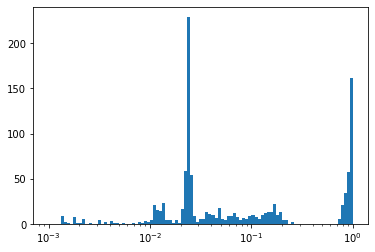

In [66]:
#_ack = plt.hist(full_diff[good]*24., bins=np.arange(26))
ack = plt.hist(full_diff[good], bins=np.logspace(np.log10(0.001),np.log10(1.0), 100))
plt.gca().set_xscale("log")

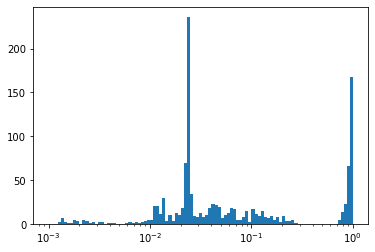

In [59]:
ack = plt.hist(full_diff[good], bins=np.logspace(np.log10(0.001),np.log10(1.0), 100))
plt.gca().set_xscale("log")